In [4]:
# Check if GPU is enabled
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.8.0
/device:GPU:0


2023-04-25 05:29:21.659035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:29:21.659948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:29:21.660567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:29:21.661304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:29:21.661948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [5]:
# Helper function to download data and extract
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [ ]:
# Download data and extract it to folder
get_data_extract()

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-04-25 05:36:40.232269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:36:40.233095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:36:40.233700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:36:40.234520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:36:40.235196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2761685859501167231
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14467989504
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16707326016829467623
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
# Check the extracted dataset folder
!ls food-101/

README.txt  license_agreement.txt  test       train
images	    meta		   test_mini  train_mini


In [ ]:
import os
os.listdir('food-101/images')

In [ ]:
os.listdir('food-101/meta')

In [ ]:
!head food-101/meta/train.txt

In [ ]:
!head food-101/meta/classes.txt

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

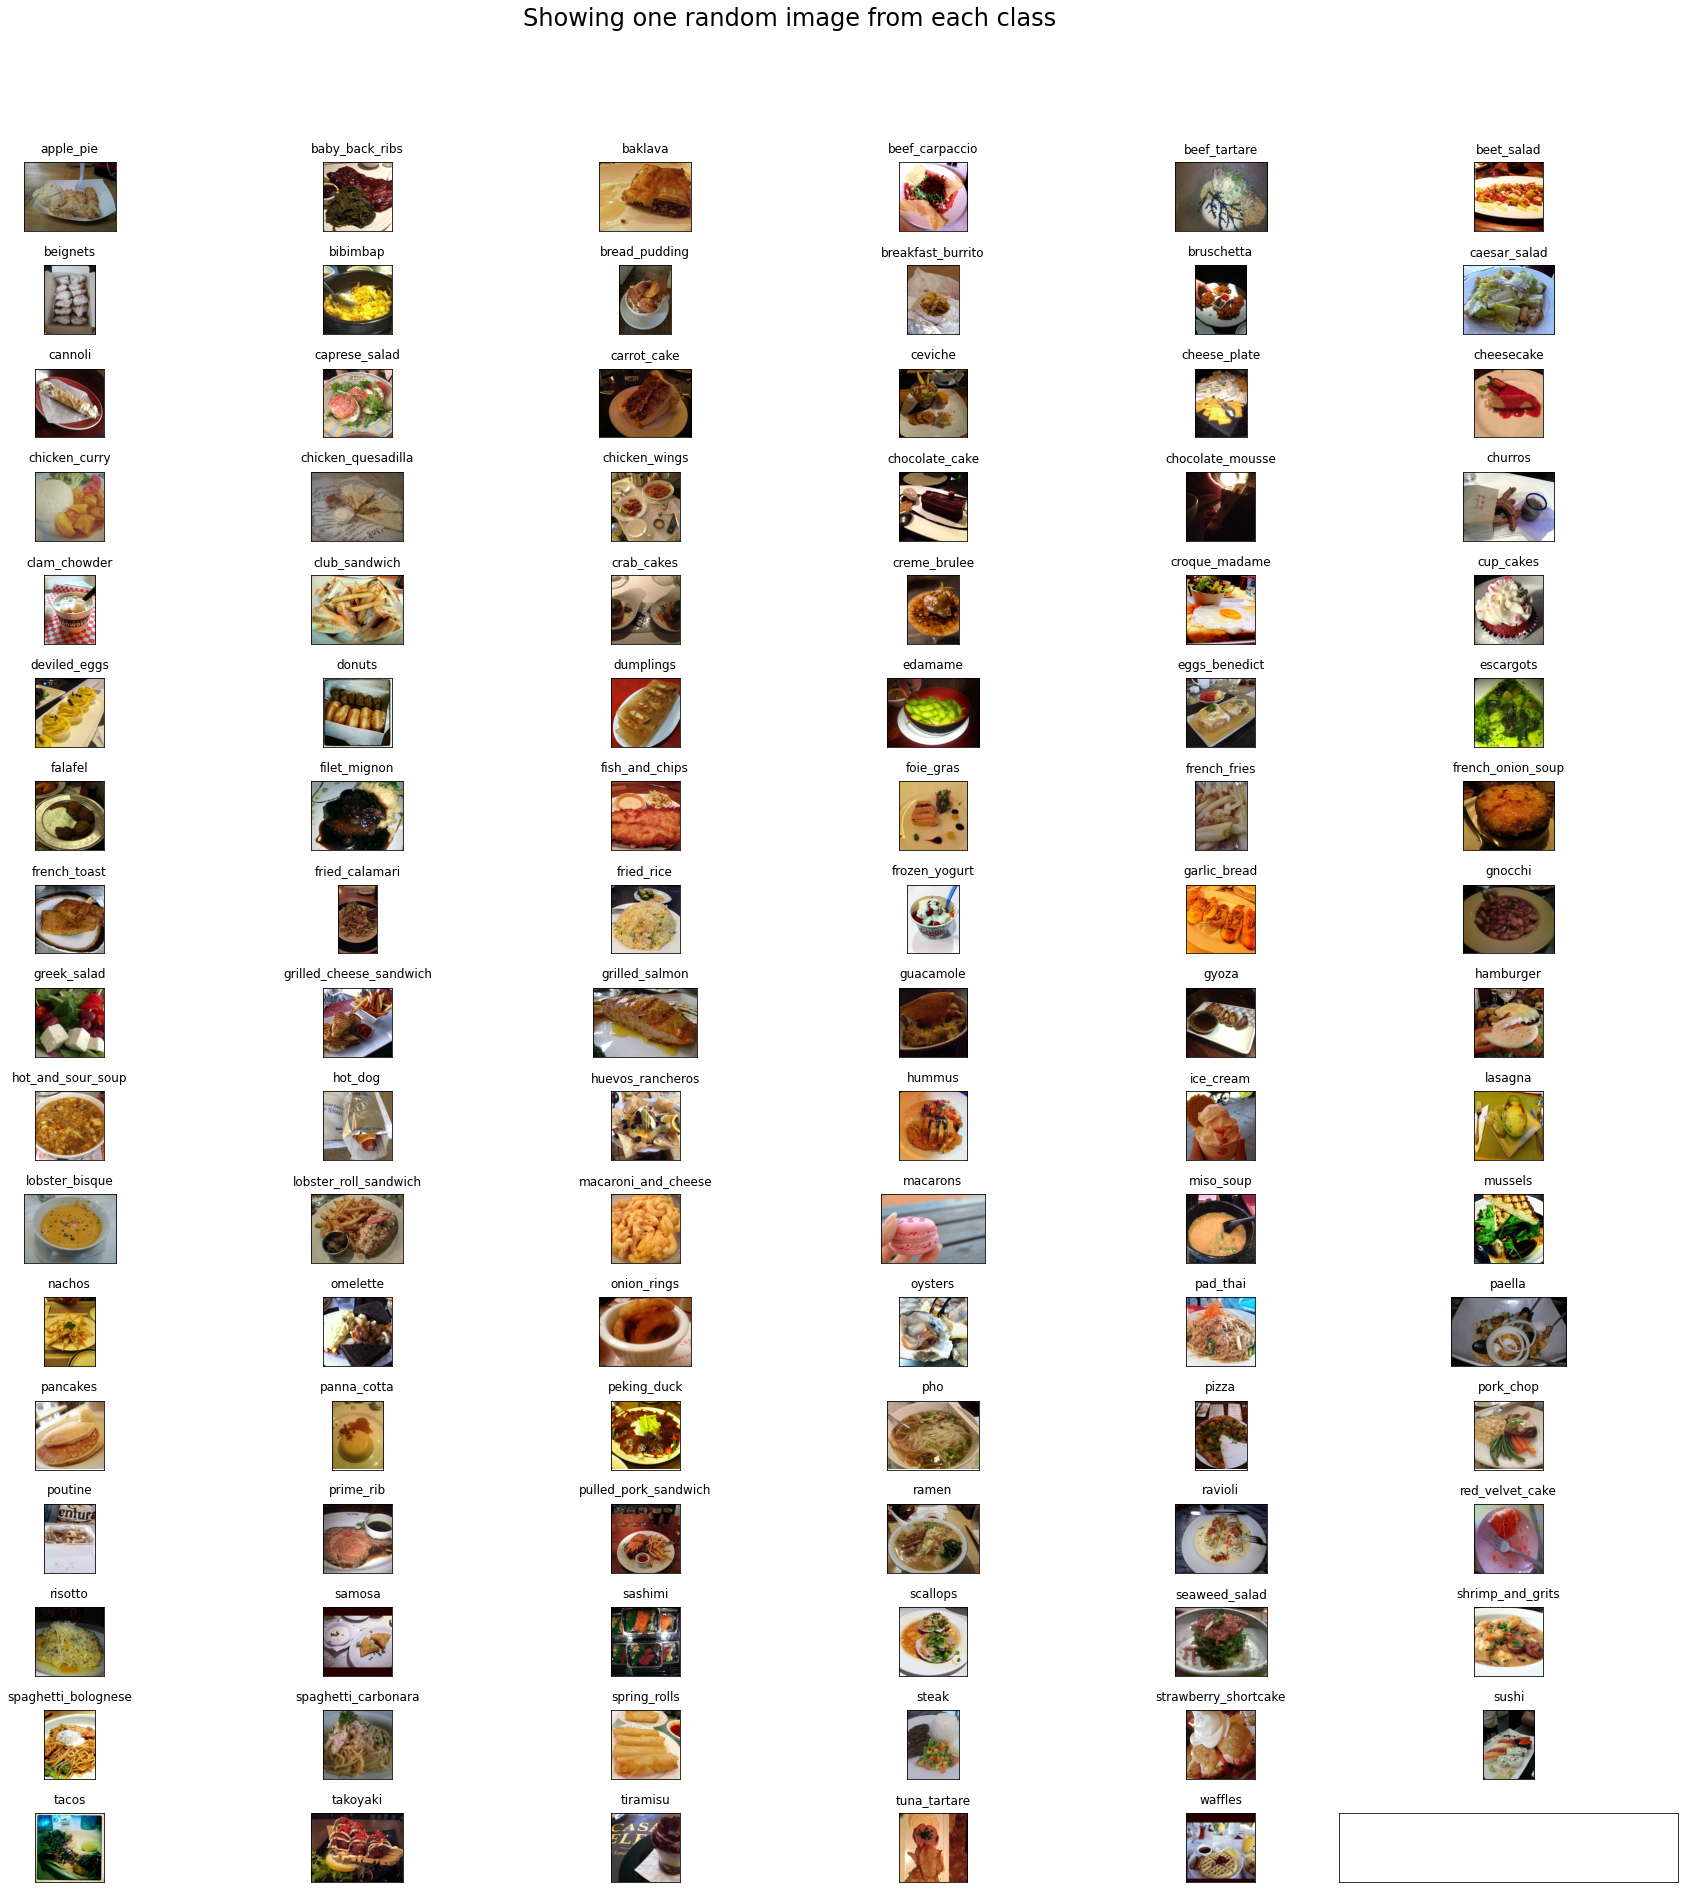

In [5]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### Split the image data into train and test using train.txt and test.txt

In [6]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [12]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [13]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [9]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [10]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


### Create a subset of data with few classes(3) - train_mini and test_mini for experimenting

* We now have train and test data ready  
* But to experiment and try different architectures, working on the whole data with 101 classes takes a lot of time and computation  
* To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes  
* Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [7]:
# List of all 101 types of foods(sorted alphabetically)
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [17]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [8]:
# picking 3 food items and generating separate data folders for the same
food_list = ['samosa','pizza','omelette']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

### Visualize the accuracy and loss plots

In [9]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


# plot_accuracy(history,'FOOD101-Inceptionv3')
# plot_loss(history,'FOOD101-Inceptionv3')

In [ ]:
# Loading the best saved model to make predictions
%%time
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

* **Yes!!! The model got them all right!!**

### Fine tune Inceptionv3 model with 11 classes of data

In [11]:
# Helper function to select n random food classes
import random
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  print("These are the randomly picked food classes we will be training the model on...\n", food_list)
  return food_list
  

In [12]:
# Lets try with more classes than just 3. Also, this time lets randomly pick the food classes
n = 100
food_list = pick_n_random_classes(100)

These are the randomly picked food classes we will be training the model on...
 ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 

In [22]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

Creating training data folder with new classes...
Copying images into apple_pie
Copying images into baby_back_ribs
Copying images into baklava
Copying images into beef_carpaccio
Copying images into beef_tartare
Copying images into beet_salad
Copying images into beignets
Copying images into bibimbap
Copying images into bread_pudding
Copying images into breakfast_burrito
Copying images into bruschetta
Copying images into caesar_salad
Copying images into cannoli
Copying images into caprese_salad
Copying images into carrot_cake
Copying images into ceviche
Copying images into cheese_plate
Copying images into cheesecake
Copying images into chicken_curry
Copying images into chicken_quesadilla
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into chocolate_mousse
Copying images into churros
Copying images into clam_chowder
Copying images into club_sandwich
Copying images into crab_cakes
Copying images into creme_brulee
Copying images into croque_madame
Copyin

In [23]:
print("Total number of samples in train folder")
!find food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75000


In [24]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into baby_back_ribs
Copying images into baklava
Copying images into beef_carpaccio
Copying images into beef_tartare
Copying images into beet_salad
Copying images into beignets
Copying images into bibimbap
Copying images into bread_pudding
Copying images into breakfast_burrito
Copying images into bruschetta
Copying images into caesar_salad
Copying images into cannoli
Copying images into caprese_salad
Copying images into carrot_cake
Copying images into ceviche
Copying images into cheese_plate
Copying images into cheesecake
Copying images into chicken_curry
Copying images into chicken_quesadilla
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into chocolate_mousse
Copying images into churros
Copying images into clam_chowder
Copying images into club_sandwich
Copying images into crab_cakes
Copying images into creme_brulee
Copying images into croque_madame
Copying image

In [25]:
print("Total number of samples in test folder")
!find food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25000


In [ ]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

K.clear_session()

n_classes = n
#img_width, img_height = 255, 255
img_width, img_height = 299, 299
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 75000 #75750
nb_validation_samples = 25000 #25250
batch_size = 16
#batch_size = 16 원래는 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_11class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=15,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_11class.hdf5')



Found 75000 images belonging to 100 classes.
Found 25000 images belonging to 100 classes.


2023-04-28 14:58:40.453778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 14:58:41.246847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 14:58:41.248027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 14:58:41.266258: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/15


2023-04-28 14:59:13.727673: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204
2023-04-28 14:59:22.471648: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


4687/4687 [==============================] - ETA: 0s - loss: 4.7613 - accuracy: 0.0977
Epoch 1: val_loss improved from inf to 3.77504, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 2567s 539ms/step - loss: 4.7613 - accuracy: 0.0977 - val_loss: 3.7750 - val_accuracy: 0.3271
Epoch 2/15
4687/4687 [==============================] - ETA: 0s - loss: 3.4997 - accuracy: 0.3280
Epoch 2: val_loss improved from 3.77504 to 2.39915, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 2108s 450ms/step - loss: 3.4997 - accuracy: 0.3280 - val_loss: 2.3992 - val_accuracy: 0.5613
Epoch 3/15
4687/4687 [==============================] - ETA: 0s - loss: 2.7252 - accuracy: 0.4685
Epoch 3: val_loss improved from 2.39915 to 1.86838, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1995s 426ms/step - loss: 2.7252 - accuracy: 0.4685 - val_loss: 1.8684 - val_accuracy: 0.6538
Epoch 4/15
4687/4687 [=========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4687/4687 [==============================] - ETA: 0s - loss: 1.7492 - accuracy: 0.6631
Epoch 7: val_loss improved from 1.32965 to 1.24449, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1983s 423ms/step - loss: 1.7492 - accuracy: 0.6631 - val_loss: 1.2445 - val_accuracy: 0.7704
Epoch 8/15
2430/4687 [==============>...............] - ETA: 14:59 - loss: 1.6541 - accuracy: 0.6801

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4687/4687 [==============================] - ETA: 0s - loss: 1.6336 - accuracy: 0.6853
Epoch 8: val_loss improved from 1.24449 to 1.17761, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1989s 424ms/step - loss: 1.6336 - accuracy: 0.6853 - val_loss: 1.1776 - val_accuracy: 0.7833
Epoch 9/15
1558/4687 [========>.....................] - ETA: 20:46 - loss: 1.5424 - accuracy: 0.7048

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4687/4687 [==============================] - ETA: 0s - loss: 1.5295 - accuracy: 0.7062
Epoch 9: val_loss improved from 1.17761 to 1.12623, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1985s 424ms/step - loss: 1.5295 - accuracy: 0.7062 - val_loss: 1.1262 - val_accuracy: 0.7923
Epoch 10/15
2175/4687 [============>.................] - ETA: 16:42 - loss: 1.4579 - accuracy: 0.7201

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4687/4687 [==============================] - ETA: 0s - loss: 1.4418 - accuracy: 0.7233
Epoch 10: val_loss improved from 1.12623 to 1.08461, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1981s 423ms/step - loss: 1.4418 - accuracy: 0.7233 - val_loss: 1.0846 - val_accuracy: 0.7998
Epoch 11/15
4687/4687 [==============================] - ETA: 0s - loss: 1.3664 - accuracy: 0.7372
Epoch 11: val_loss improved from 1.08461 to 1.04468, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1996s 426ms/step - loss: 1.3664 - accuracy: 0.7372 - val_loss: 1.0447 - val_accuracy: 0.8051
Epoch 12/15
4687/4687 [==============================] - ETA: 0s - loss: 1.2976 - accuracy: 0.7513
Epoch 12: val_loss improved from 1.04468 to 1.00927, saving model to best_model_11class.hdf5
4687/4687 [==============================] - 1990s 424ms/step - loss: 1.2976 - accuracy: 0.7513 - val_loss: 1.0093 - val_accuracy: 0.8087
Epoch 13/15
4687/4687 

In [ ]:
plot_accuracy(history_11class,'FOOD101-Inceptionv3')
plot_loss(history_11class,'FOOD101-Inceptionv3')

* **The plots show that the accuracy of the model increased with epochs and the loss has decreased**
* **Validation accuracy has been on the higher side than training accuracy for many epochs**
* **This could be for several reasons:**
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* **I set number of epochs to just 10, as each epoch's taking around 6mins**
* **loss is still decreasing, so the model can have some more epochs**
* **Increase the number of epochs for better accuracy**
 


In [ ]:
# Loading the best saved model to make predictions
%%time
from tensorflow.keras.models import load_model
K.clear_session()
model_best = load_model('best_model_11class.hdf5',compile = False)

In [ ]:
# Downloading images from internet using the URLs
!wget -O frenchfries.jpg https://www.dirtyapronrecipes.com/wp-content/uploads/2017/03/french-fries.jpg
!wget -O chocolatecake.jpg https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Hersheys-Perfectly-Chocolate-Chocolate-Cake-13.jpg
!wget -O waffles.jpg https://upload.wikimedia.org/wikipedia/commons/5/5b/Waffles_with_Strawberries.jpg
!wget -O applepie.jpg https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg

# If you have an image in your local computer and want to try it, uncomment the below code to upload the image files


# from google.colab import files
# image = files.upload()

In [ ]:
# Make a list of downloaded images and test the trained model
images = []
images.append('frenchfries.jpg')
images.append('chocolatecake.jpg')
images.append('applepie.jpg')
images.append('waffles.jpg')
predict_class(model_best, images, True)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [28]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-04-25 05:57:19.716647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


True

2023-04-25 05:57:19.717378: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:57:19.717870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:57:19.718491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:57:19.719021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 05:57:19.719618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 1

In [29]:
import torch

torch.cuda.is_available()

True

In [ ]:
import tensorflow as tf 
tf.__version__ # 버전 확인, '2.1.0' 

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices() )
print(tf.test.is_gpu_available() 

In [ ]:
##print("hello")

In [ ]:
print("hello world!")